# Netflix dataset EDA

# Questions we need to answer 
- what is the month that have least releases?
- what is the most genre in the data set movies/Tvshows ?
- In which year has been released largest number of movies/Tvshows?
- which country has released most movies/Tvshows?
- what is the range of duration to movies/Tvshows?
- what is the most popular rating in movies/Tv shows?
- what is the TVshow that has most seasons?
- what is the content in Egyptian?


In [1]:
#import important libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import time

 - remove warnings

In [2]:
import warnings
warnings.simplefilter('ignore')

# Let's have imformation about the dataset

In [3]:
#read csv file
nt = pd.read_csv('netflix_titles.csv')
nt.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
#show number of rows and columns
nt.shape

(8807, 12)

In [5]:
#show columns name
nt.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
#show datatype and count non null values
nt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
#summary statistics of object columns
nt.describe(include = 'object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [8]:
#show if there is full duplicates 
nt.duplicated().sum()

0

## Conclusion
- The dataset has `8807` rows, `12` columns.
- `id` and `description` columns are useless so we can drop them.
- We have null values so we need to clean the dataset.
- There is `no full duplicates` in the dataset.


# Cleaning Dataset

- clean `country` column 

In [9]:
nt['country'].isna().sum()

831

In [10]:
nt['country'] = nt['country'].fillna(nt['country'].mode()[0])
nt['country'] = nt['country'].astype(str)
nt['country'] = nt['country'].apply(lambda x : x.split(', ')[0])

In [11]:
nt['country'].value_counts()

United States     4041
India             1008
United Kingdom     626
Canada             271
Japan              259
                  ... 
Namibia              1
Senegal              1
Cameroon             1
Syria                1
Somalia              1
Name: country, Length: 89, dtype: int64

- clean `rating` column

In [12]:
#show unique values
nt['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [13]:
nt['rating'] = nt['rating'].replace({'74 min' : np.nan, '84 min' : np.nan, '66 min': np.nan
                                    , 'TV-Y7-FV' : 'TV-Y7'})
nt['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', nan, 'NR', 'UR'], dtype=object)

- clean `director` and `cast` columns

In [14]:
nt['director'].isnull().sum()

2634

In [15]:
nt['director'].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

In [16]:
#compute the percentage of null values 
null_percent = nt.isnull().sum() * 100 / nt.shape[0]
null_percent.round(2).sort_values(ascending = False)

director        29.91
cast             9.37
date_added       0.11
rating           0.08
duration         0.03
show_id          0.00
type             0.00
title            0.00
country          0.00
release_year     0.00
listed_in        0.00
description      0.00
dtype: float64

- fill null values in all columns

In [17]:
#fill null values with new category
nt['director'].fillna('Unkown', inplace= True)
nt['cast'].fillna('Unkown', inplace= True)

In [18]:
#fill null values with mode
mode_fill = ['date_added','rating','duration']
for i in mode_fill:
    nt[i] = nt[i].fillna(nt[i].mode()[0])

In [19]:
nt['month'] = nt['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
nt['year'] = nt['date_added'].apply(lambda x : x.split(', ')[-1])

In [20]:
#drop useless columns
nt.drop(['show_id','date_added','description'],axis=1, inplace= True)
nt.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
month           0
year            0
dtype: int64

In [21]:
nt.head(5)

,type,title,director,cast,country,release_year,rating,duration,listed_in,month,year
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unkown,United States,2020,PG-13,90 min,Documentaries,September,2021
1,TV Show,Blood & Water,Unkown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",September,2021
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",September,2021
3,TV Show,Jailbirds New Orleans,Unkown,Unkown,United States,2021,TV-MA,1 Season,"Docuseries, Reality TV",September,2021
4,TV Show,Kota Factory,Unkown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",September,2021


# Conclusion
- I separated the countries in `country` column.
- There are wrong values in `rating` column so i replce it with right values.
- There are a lot of null values in `director` we impute the null values with `unkown`.
- I used `mode()` to impute null values with most frequent values in `'country','date_added','rating','duration'`.
- I added `month` and `year` columns to the data set.
- finally the dataset now has no null values.

# Data Visualization

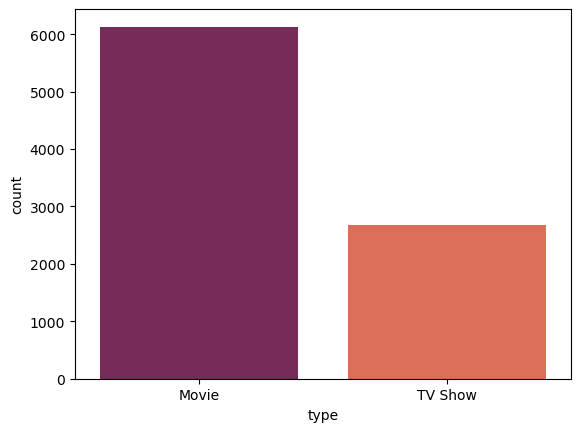

In [22]:
sns.countplot(x ='type', data = nt, palette="rocket")
plt.show()

- number of movies is approximately twice the number of tv shows

## What is the month that have least releases?



In [23]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']

df = nt.groupby('year')['month'].value_counts().unstack()[month_order]

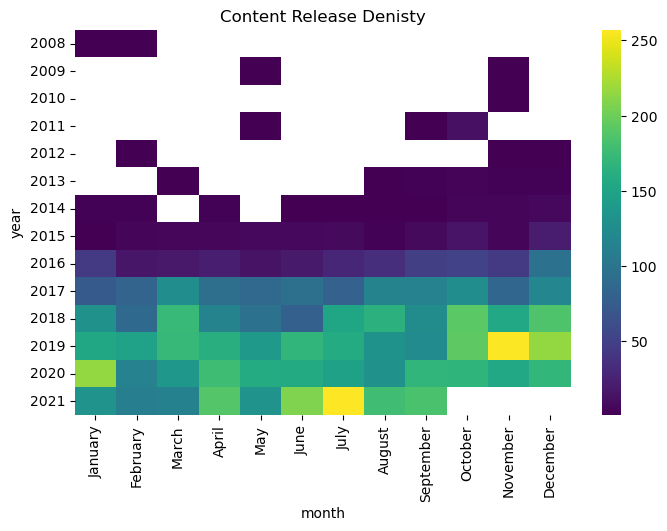

In [24]:
fig,ax = plt.subplots(1, 1 ,figsize = (8,5))
ax = sns.heatmap(df, cmap = "viridis")
plt.title('Content Release Denisty')
plt.show()

- so based on the last complete year `2020` the best months to add new content are `February`,`March` and `May`

## Which is the most common genre in the data set movies / Tvshows ?


In [25]:
# making a dataframe for movies 

movies = (nt['type'] == 'Movie')
movies_df = nt[movies]
movies_df.head(3)

,type,title,director,cast,country,release_year,rating,duration,listed_in,month,year
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unkown,United States,2020,PG-13,90 min,Documentaries,September,2021
6,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021,PG,91 min,Children & Family Movies,September,2021
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",September,2021


In [26]:
#make a dataframe for tvshows

TV_Show = (nt['type'] == 'TV Show')
tv_df = nt[TV_Show]
tv_df.head(3)

,type,title,director,cast,country,release_year,rating,duration,listed_in,month,year
1,TV Show,Blood & Water,Unkown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",September,2021
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",September,2021
3,TV Show,Jailbirds New Orleans,Unkown,Unkown,United States,2021,TV-MA,1 Season,"Docuseries, Reality TV",September,2021


In [27]:
#genres for movies

genres = {}
for genre in movies_df['listed_in']:
    for i in genre.split(','):
        i= i.strip()
        if i not in genres:
            genres[i] =1
        else:
            genres[i] += 1

            
g_m_df = pd.DataFrame(list(genres.items()), columns= ['Genre', 'Number of Movies'])
g_m_df['Genre'].unique()

array(['Documentaries', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'Comedies',
       'Thrillers', 'Romantic Movies', 'Music & Musicals',
       'Horror Movies', 'Sci-Fi & Fantasy', 'Action & Adventure',
       'Classic Movies', 'Anime Features', 'Sports Movies', 'Cult Movies',
       'Faith & Spirituality', 'LGBTQ Movies', 'Stand-Up Comedy',
       'Movies'], dtype=object)

In [28]:
g_m_df.sort_values(by = 'Number of Movies', ascending = False).head()

,Genre,Number of Movies
4,International Movies,2752
2,Dramas,2427
5,Comedies,1674
0,Documentaries,869
11,Action & Adventure,859


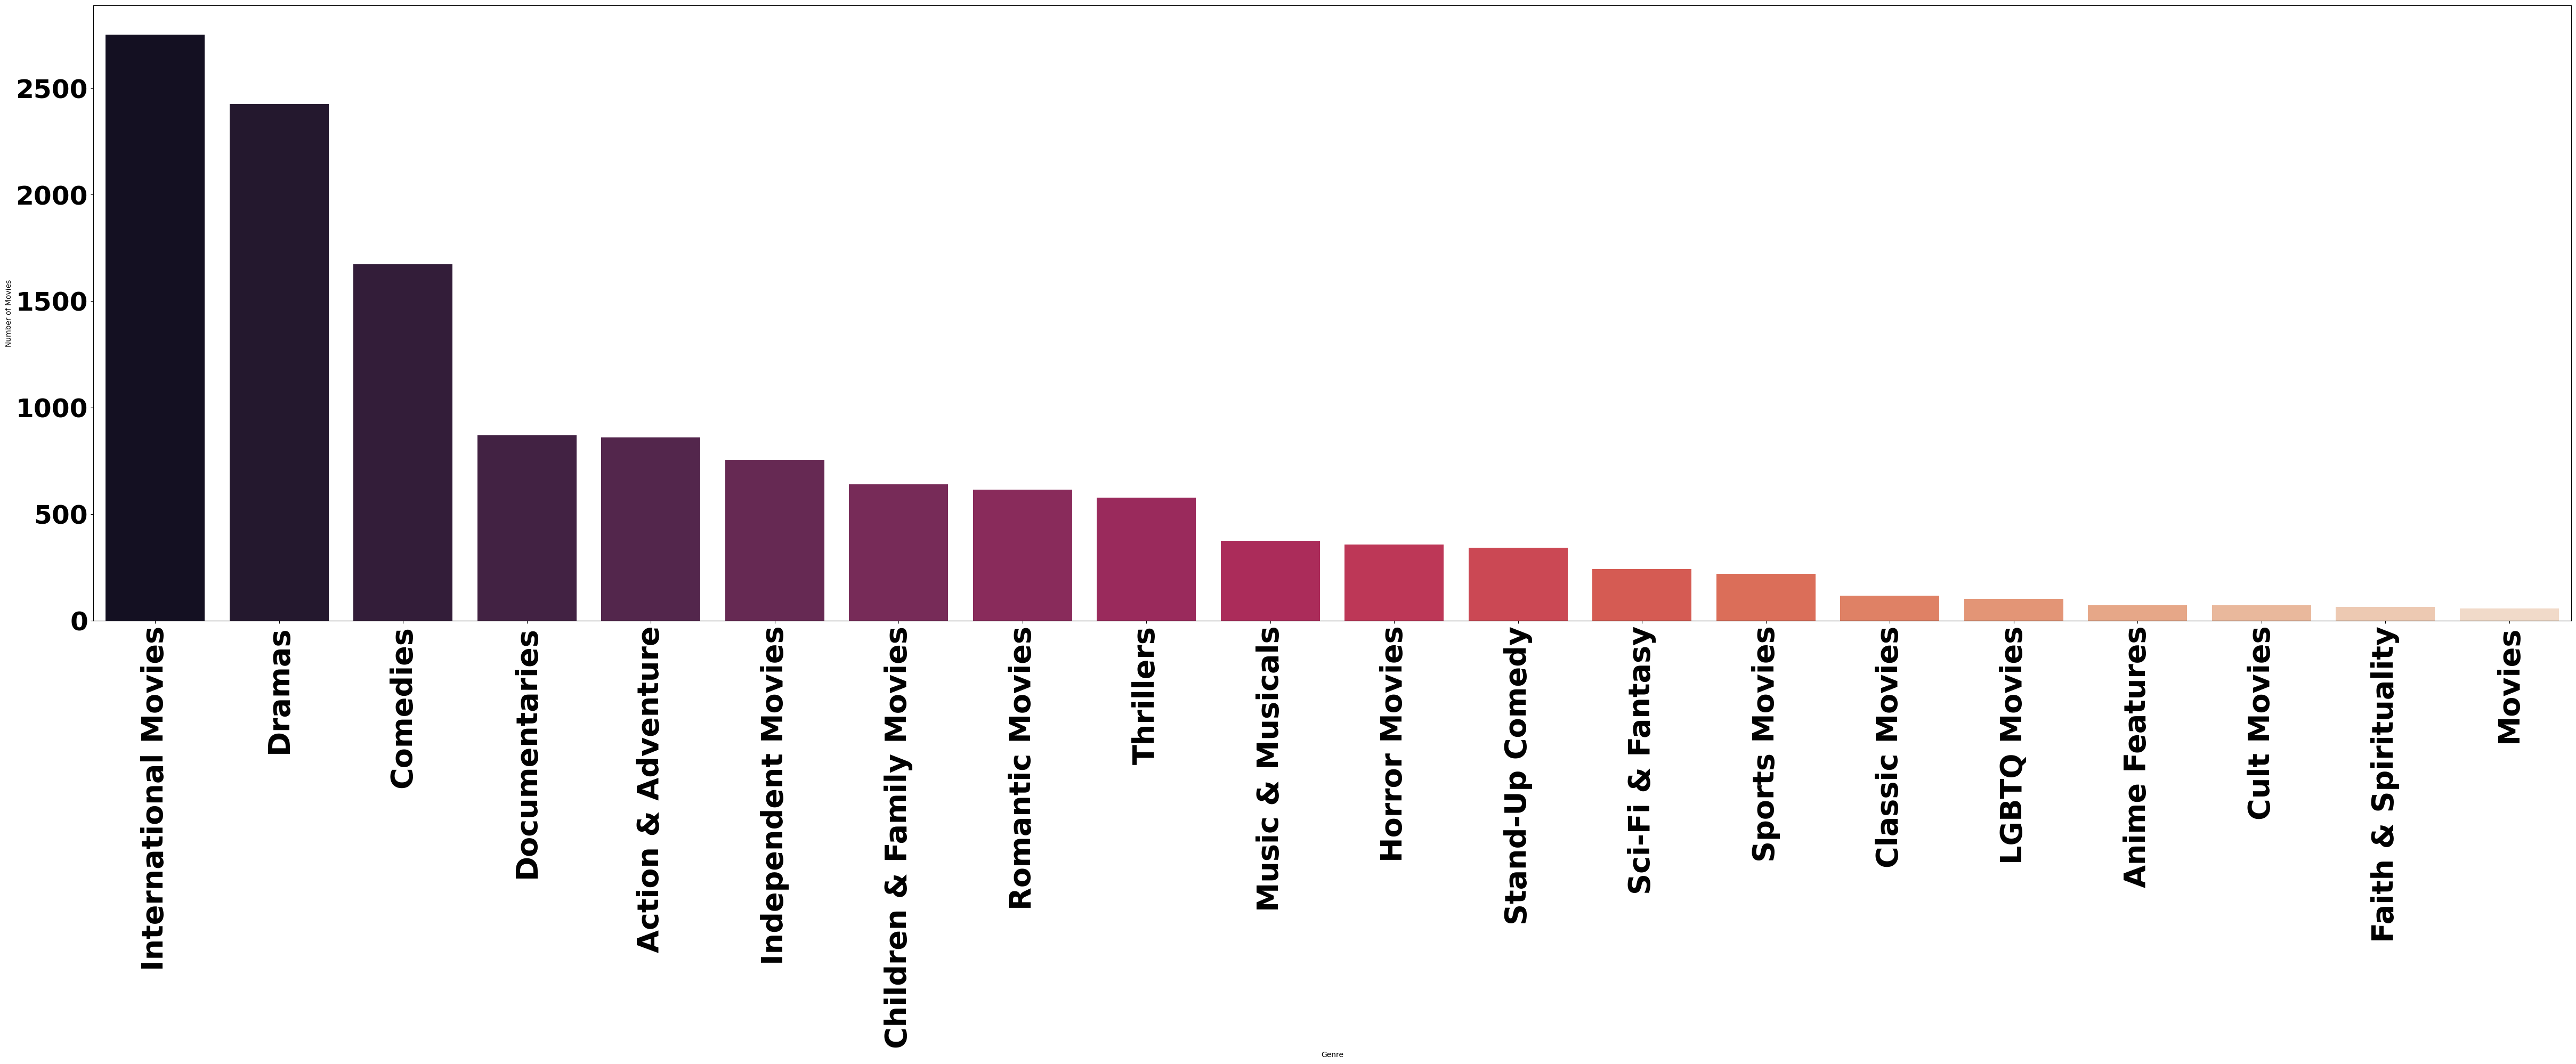

In [29]:
fig, ax = plt.subplots(figsize=(60, 15))

sns.barplot(x='Genre',y='Number of Movies',
            data=g_m_df.sort_values(by = 'Number of Movies', ascending = False),palette='rocket')

plt.tick_params(labelsize = 30)
plt.xticks(rotation = 90, fontsize = 40, weight = "bold")
plt.yticks(fontsize = 35, weight = "bold")
plt.show()

- as we can see the most movie genre is `International Movies`

In [30]:
#genres for TV shows

genres2 = {}
for genre2 in tv_df['listed_in']:
    for i in genre2.split(','):
        if i not in genres2:
            genres2[i] =1
        else:
            genres2[i] += 1
    

            
g_tv_df = pd.DataFrame(list(genres2.items()), columns= ['Genre', 'Number of TV show'])
g_tv_df.head(3)

,Genre,Number of TV show
0,International TV Shows,774
1,TV Dramas,696
2,TV Mysteries,98


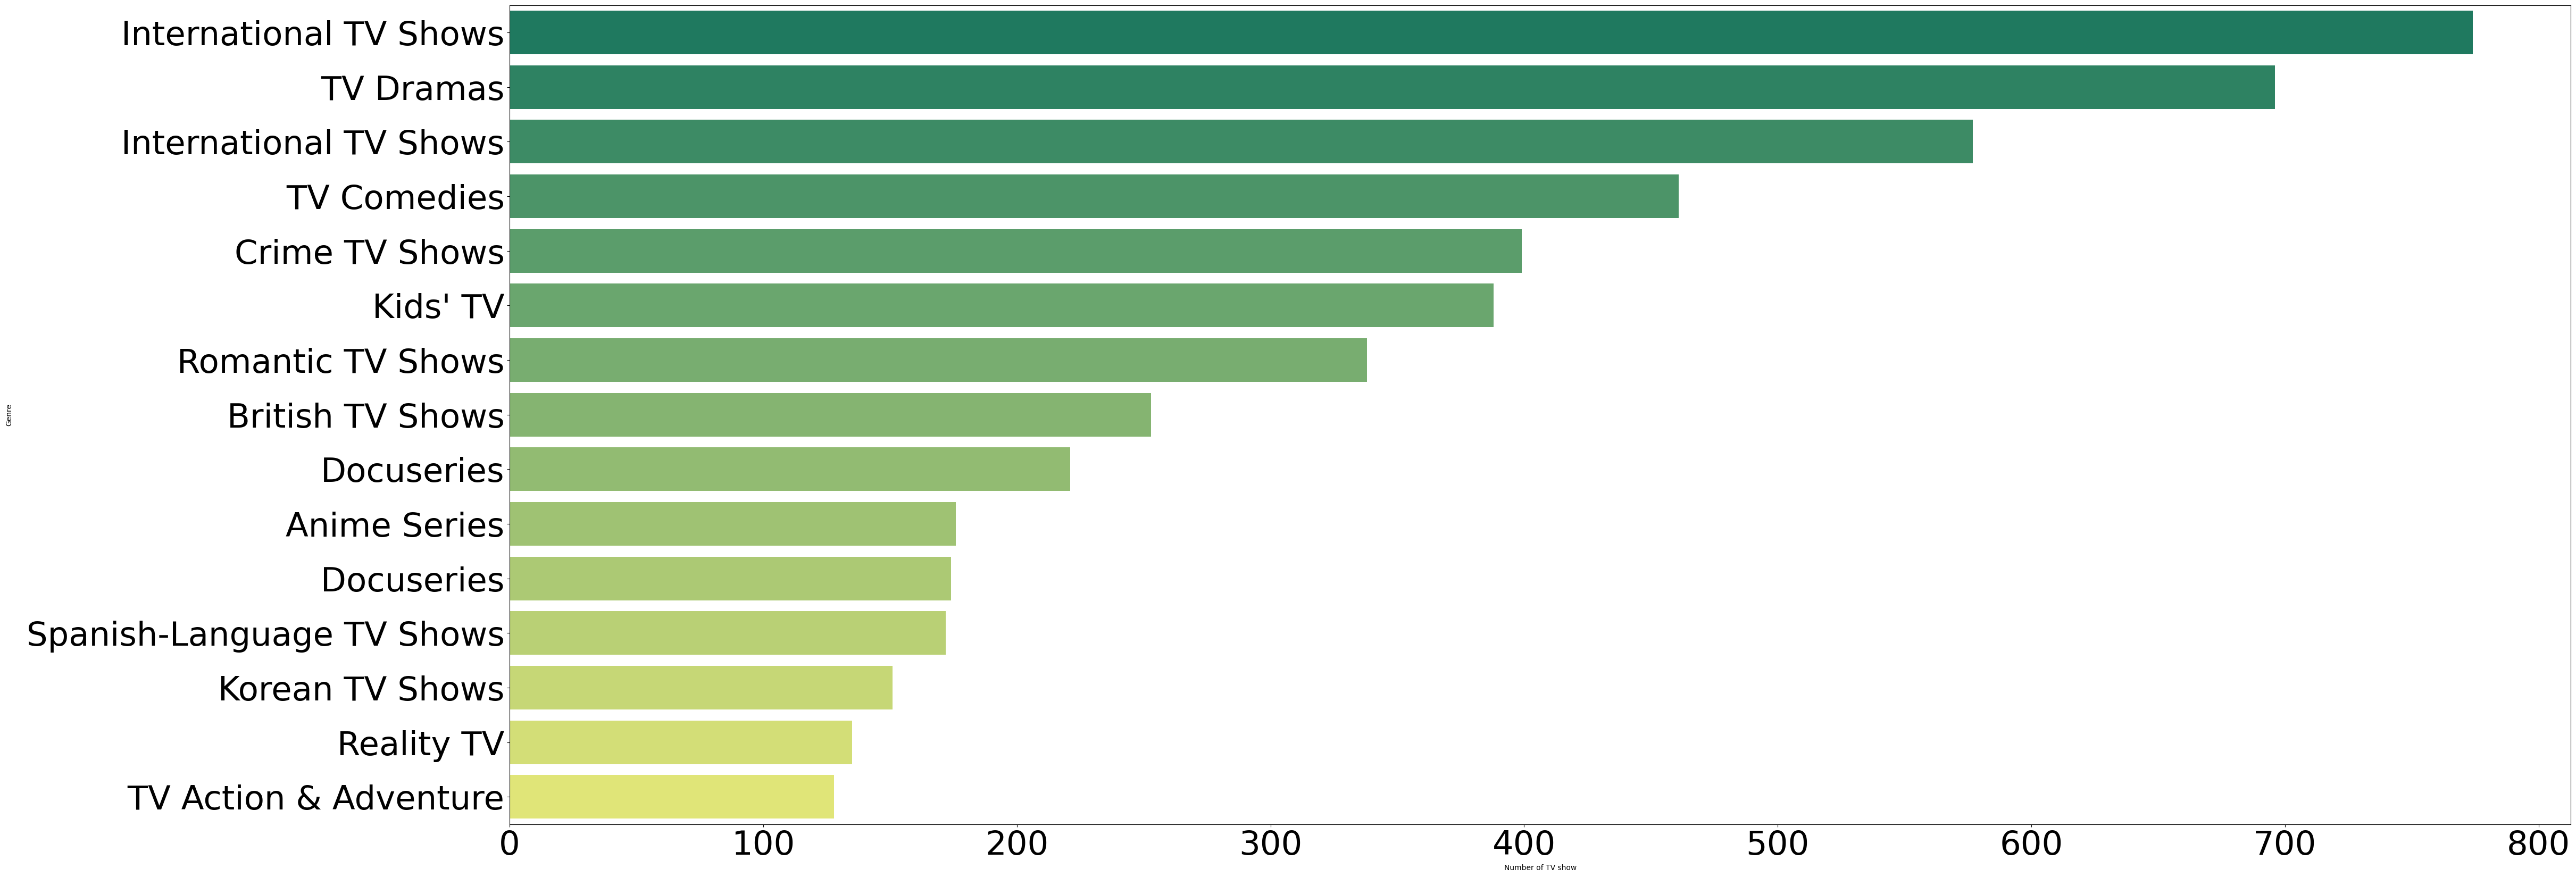

In [31]:
fig, ax = plt.subplots(figsize=(50, 20))
sns.barplot(x = 'Number of TV show', y = 'Genre',
            data = g_tv_df.sort_values(by = 'Number of TV show', ascending = False).loc[0:5],
            palette = 'summer')
            
plt.tick_params(labelsize = 45)
plt.show()

- as we can see the most movie genre is `International TV shows`

## In which year has been released largest number of movies/ Tvshows?


In [32]:
pp = nt.groupby('release_year')['type'].value_counts().unstack(level=-1)

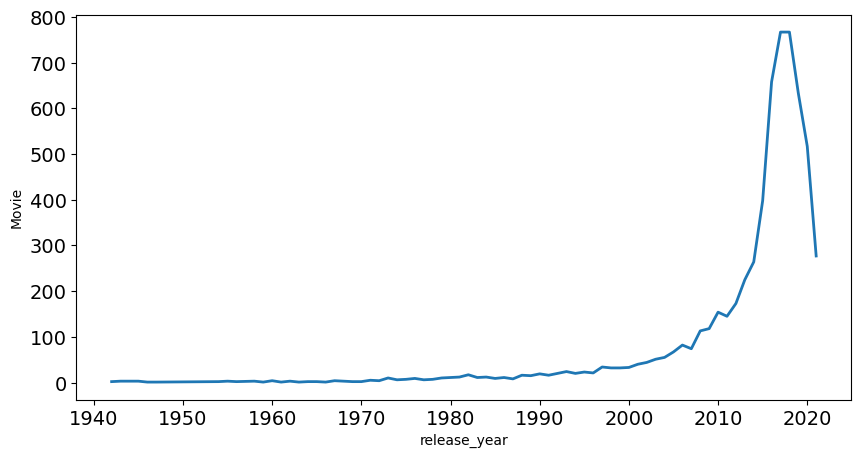

In [33]:
fig, av = plt.subplots(1, 1, figsize = (10,5))
ax = sns.lineplot(x = 'release_year', y = 'Movie', data = pp, linewidth = 2)
plt.tick_params(labelsize = 14)

plt.show()

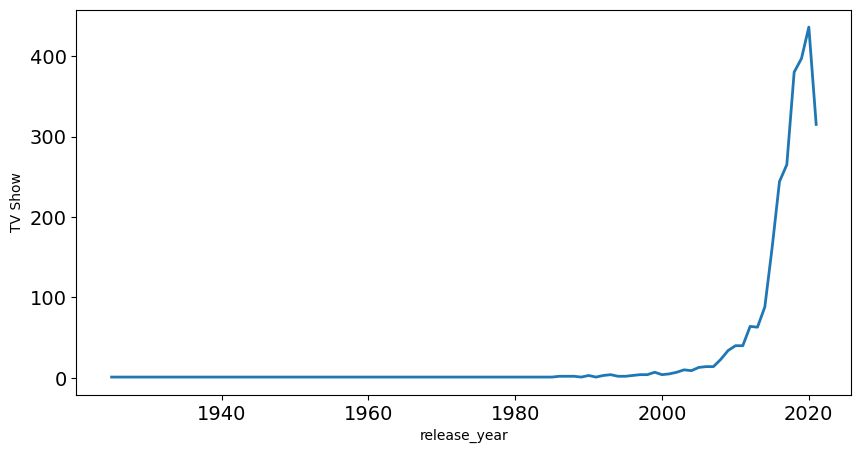

In [34]:
fig, av = plt.subplots(1, 1, figsize = (10,5))
ax = sns.lineplot(x = 'release_year', y = 'TV Show', data = pp, linewidth = 2)
plt.tick_params(labelsize = 14)

plt.show()

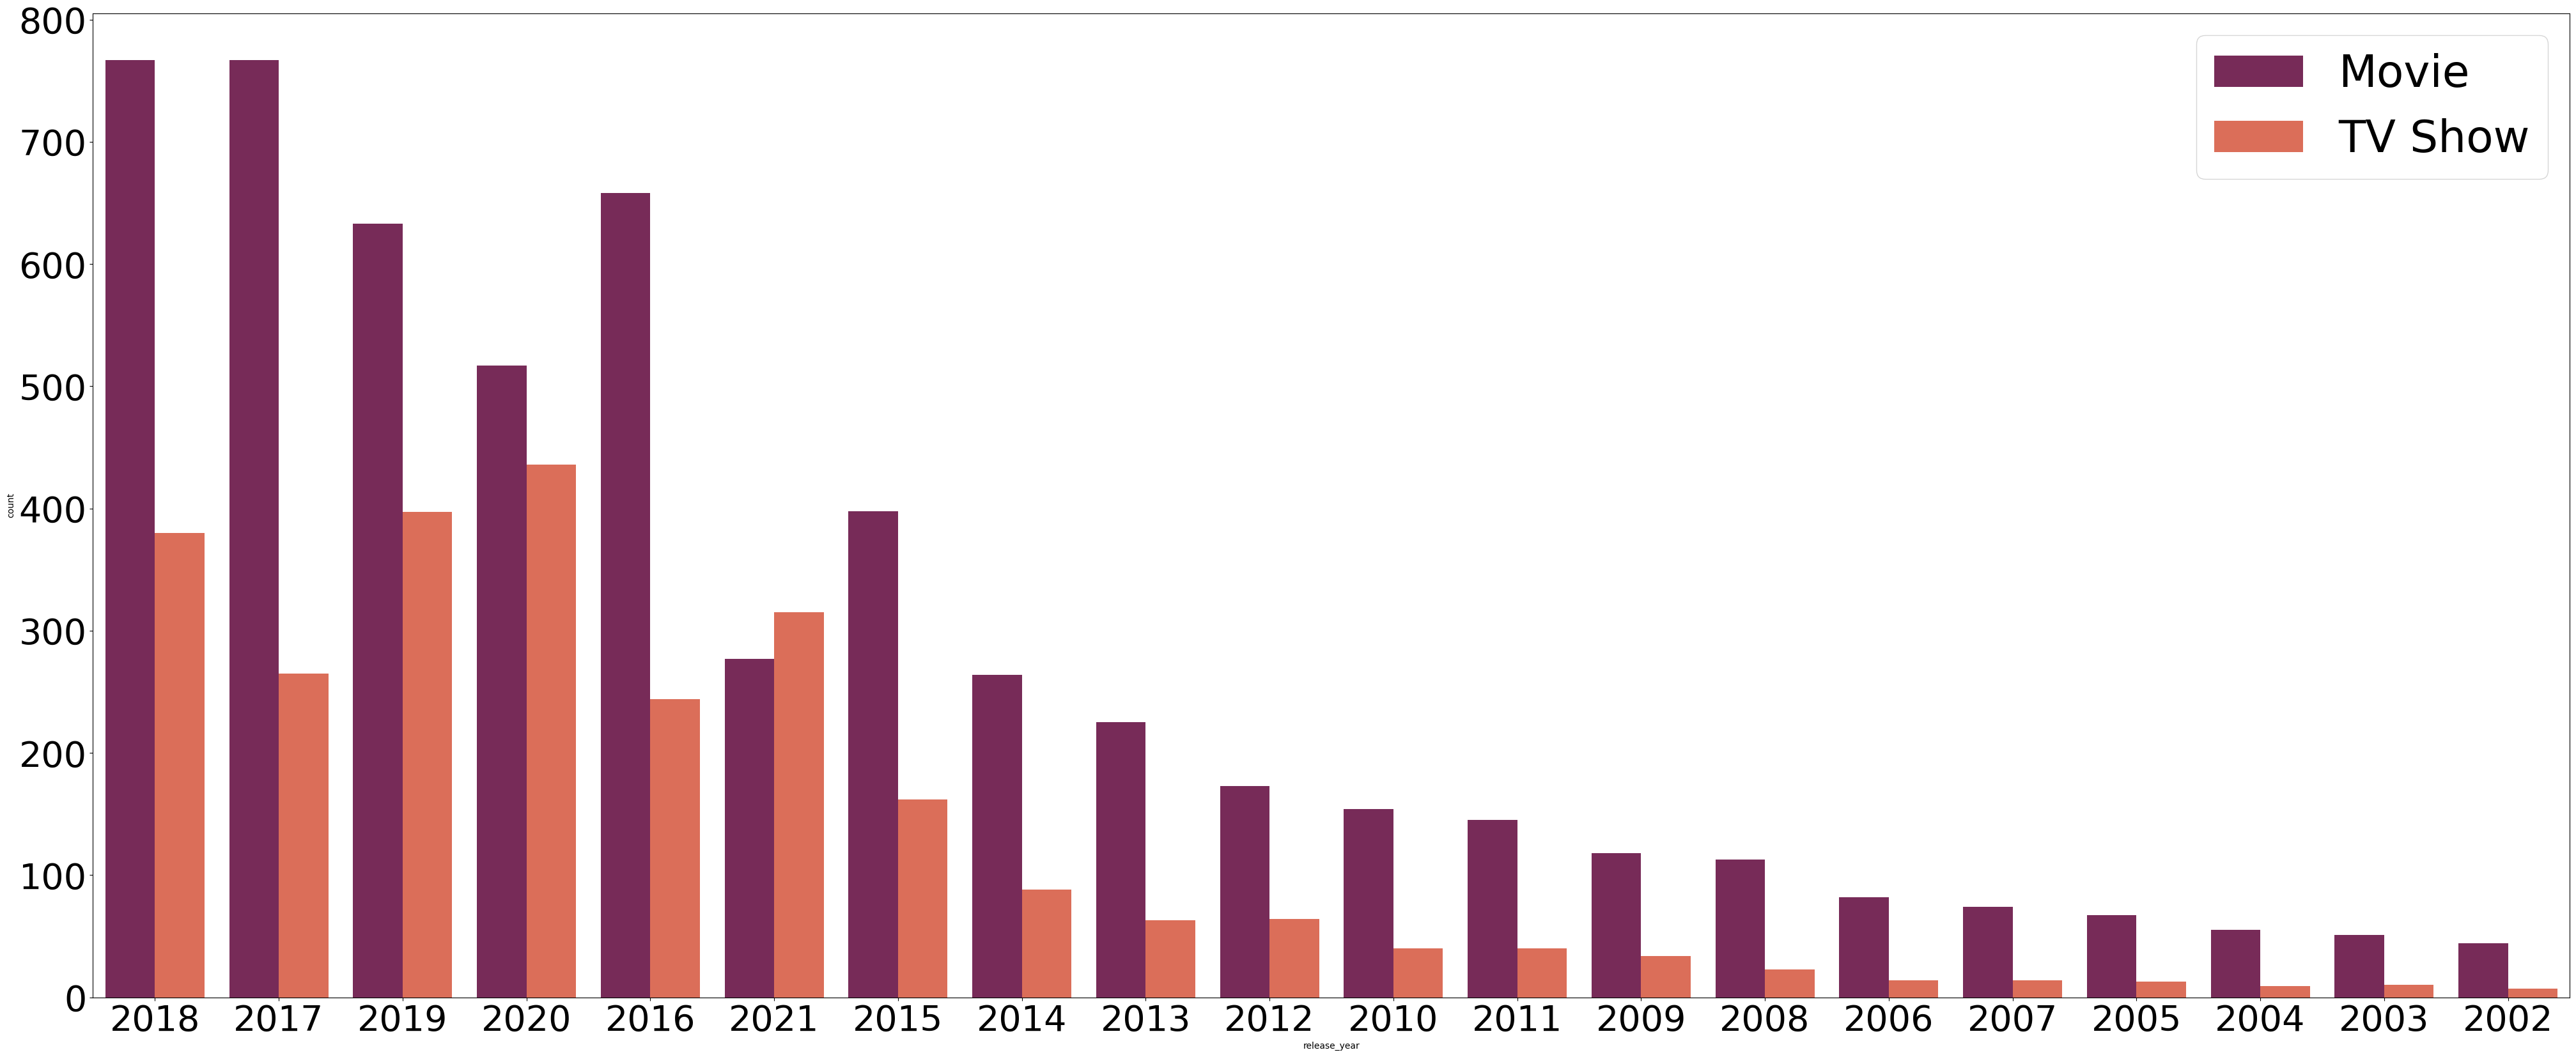

In [35]:
ig, ax = plt.subplots(figsize=(50, 20))
y = sns.countplot(x = 'release_year', data = nt, palette = 'rocket', hue= 'type', 
                  order = nt['release_year'].value_counts().index[0:20])

plt.tick_params(labelsize=40)
y.legend(fontsize=50)
plt.show()

- for movies in `2018` 
- for tv shows in `2020`

## Country with the highest releases


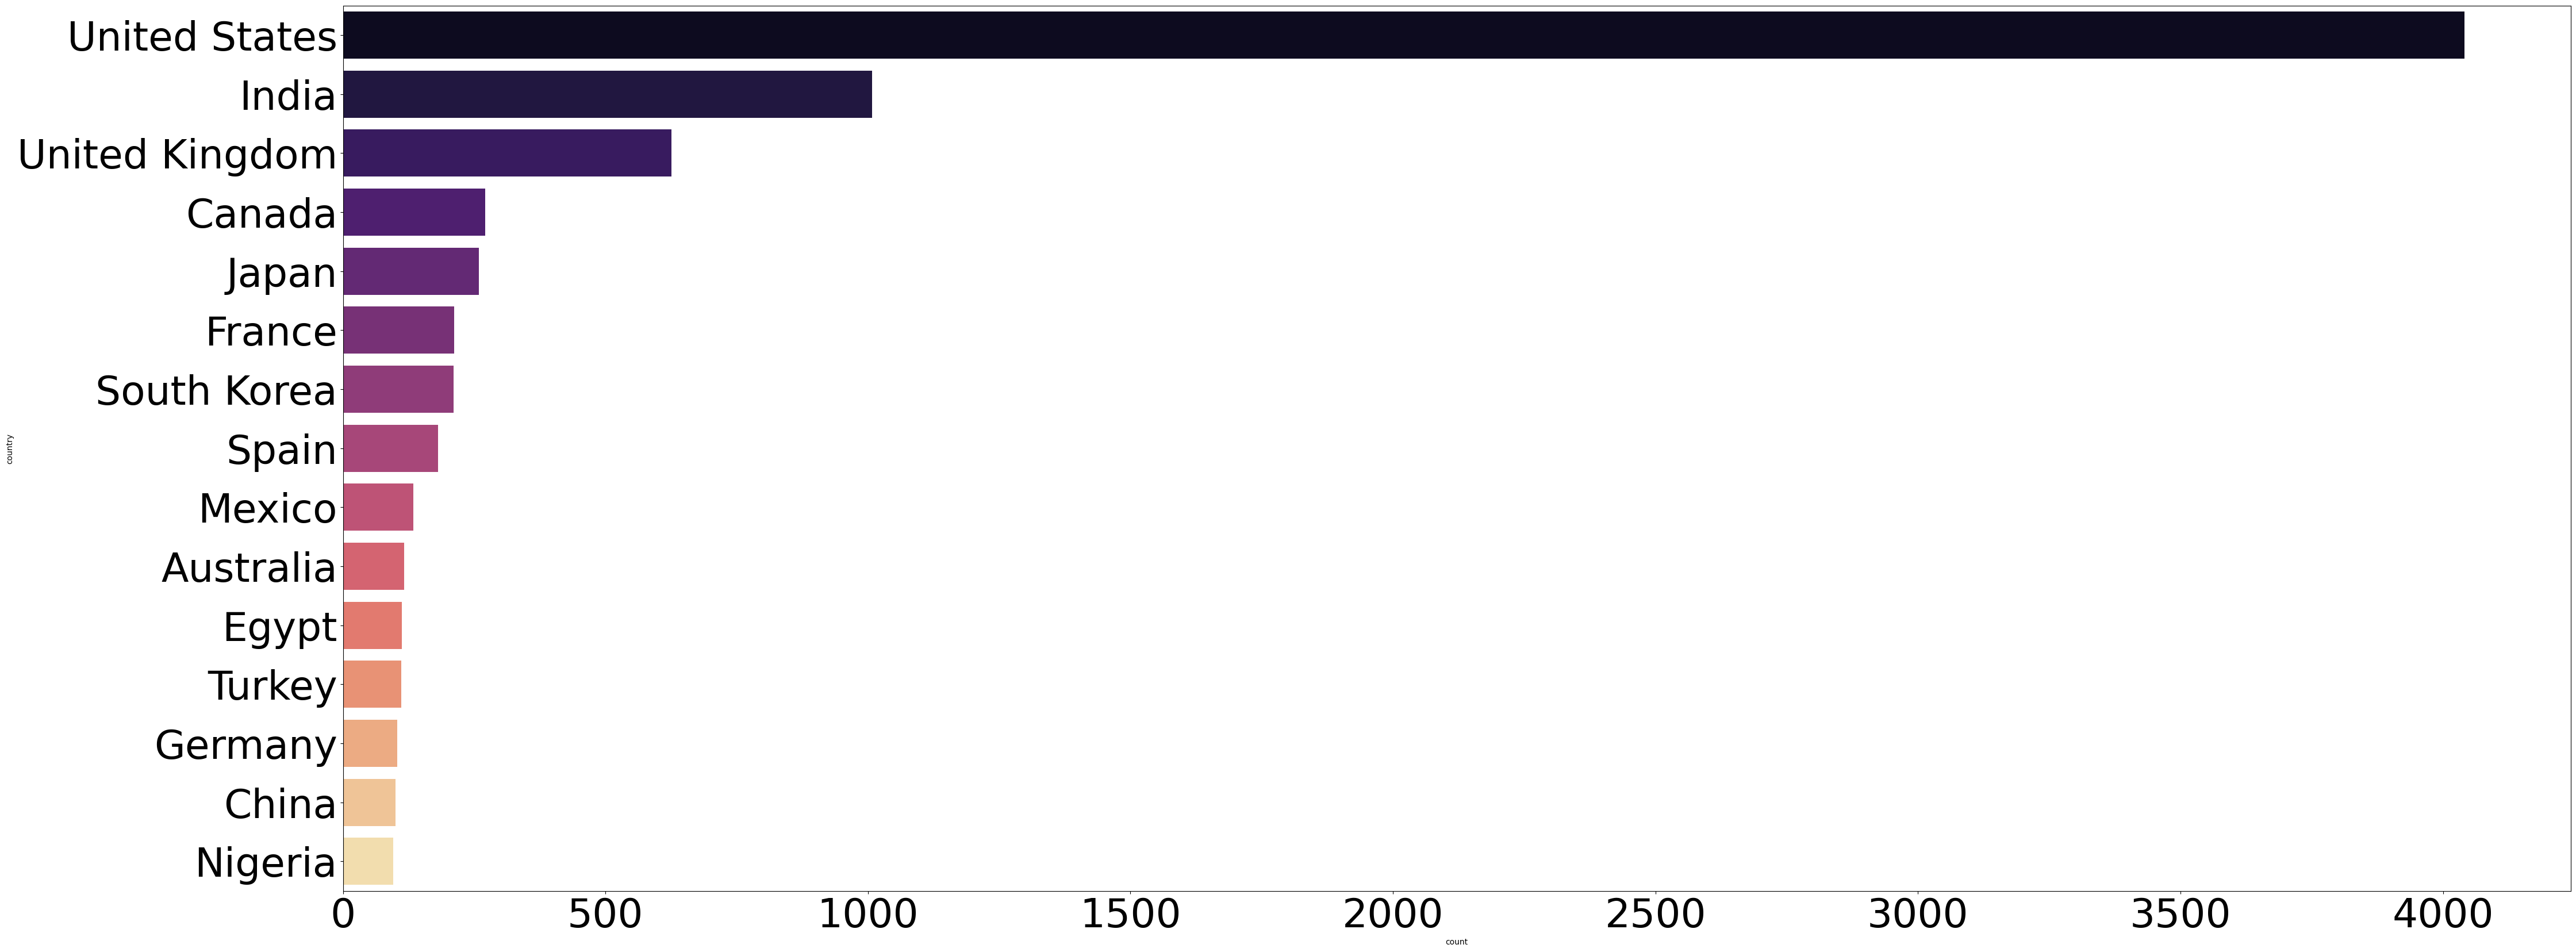

In [36]:
ig, ax = plt.subplots(figsize = (50, 20))
y = sns.countplot(y = 'country', data = nt, 
                  palette = 'magma', order = nt['country'].value_counts().index[:15])

plt.tick_params(labelsize = 50)
plt.show()

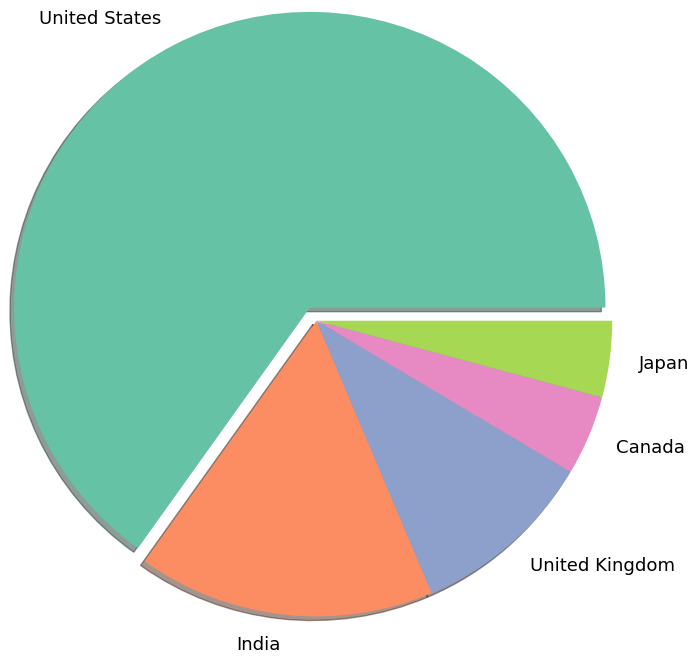

In [37]:
sizes=nt['country'].value_counts()
z = np.zeros(748)
z[0] = 0.1

labels = []
for i in nt['country'].value_counts()[:5].index:
    labels.append(i)

fig, ax = plt.subplots()
explode = (0.1, 0, 0, 0)
ax.pie(sizes[:5],explode=z[:5],labels = labels, radius = 2,shadow = True,
       textprops = {'fontsize':13}, colors=sns.color_palette('Set2'))

plt.show()

- for movies and tv shows `United States` has releasd the most

## Range of duration of movies and TV shows?


#### - first cleaning duration column in movies dataframe

In [38]:
movies_df['duration'] = movies_df['duration'].str.replace("min", " ").str.replace("Season", " ").str.strip()
movies_df['duration'] = movies_df['duration'].astype('int32')

In [39]:
#remove the 1 season movie

durayion_min = movies_df[movies_df['duration'] > 1]

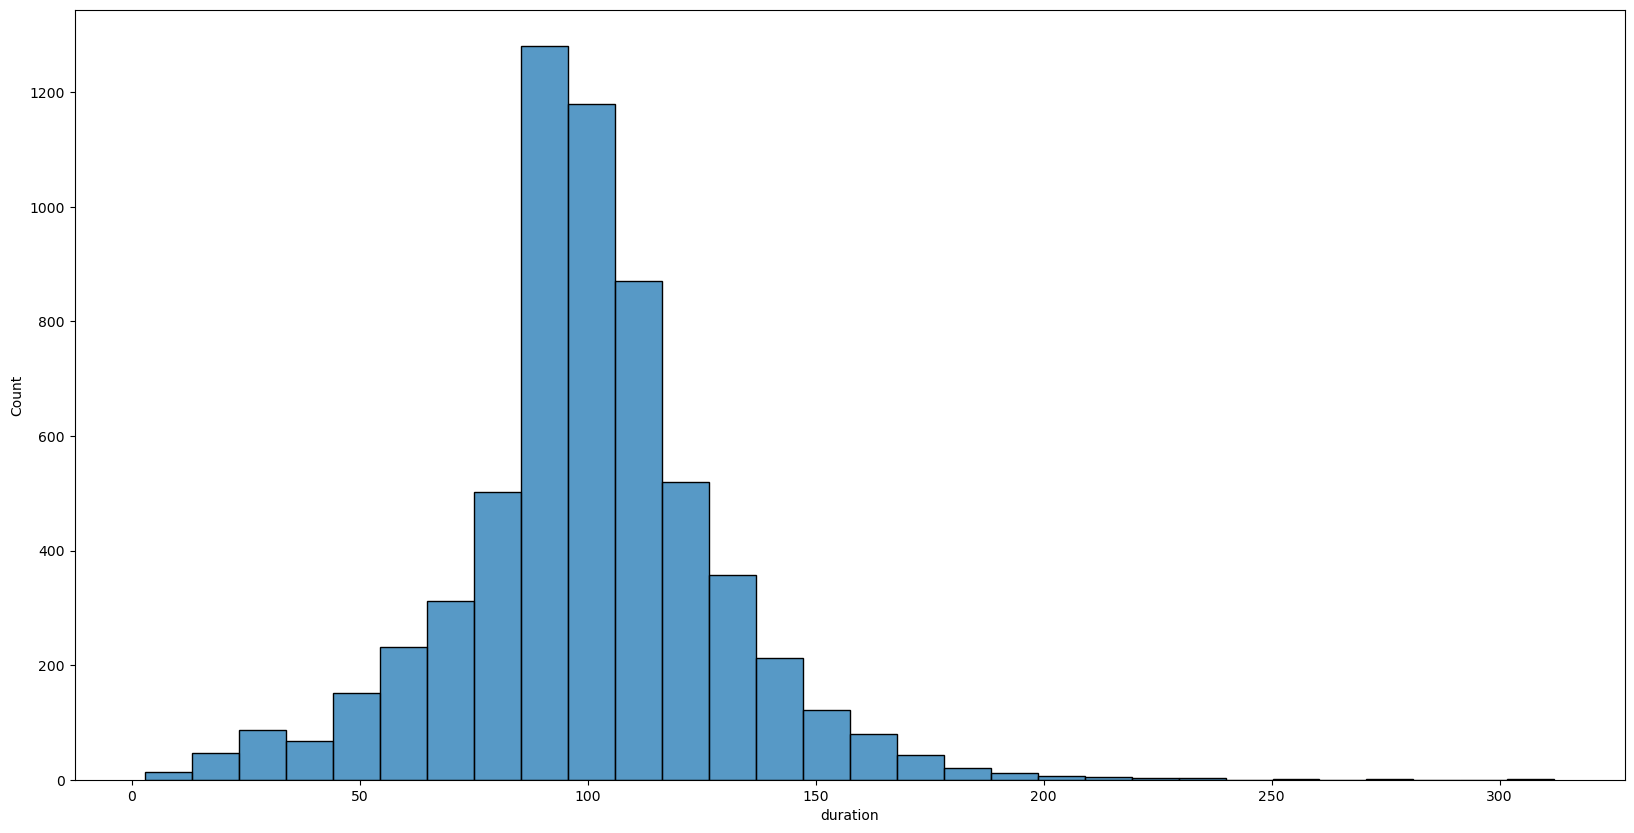

In [40]:
plt.figure(figsize=(20,10))
ax = sns.histplot(x = durayion_min['duration'], data = durayion_min, bins=30, palette = 'magma')
plt.show()

- as we can see movies duration range is between `90-100` mins.

In [41]:
#cleaning duration column in the tvshows dataframe

tv_df['duration'] = tv_df['duration'].str.replace("Seasons", " ").str.replace("Season", " ").str.strip()
tv_df['duration'] = tv_df['duration'].astype('int32')

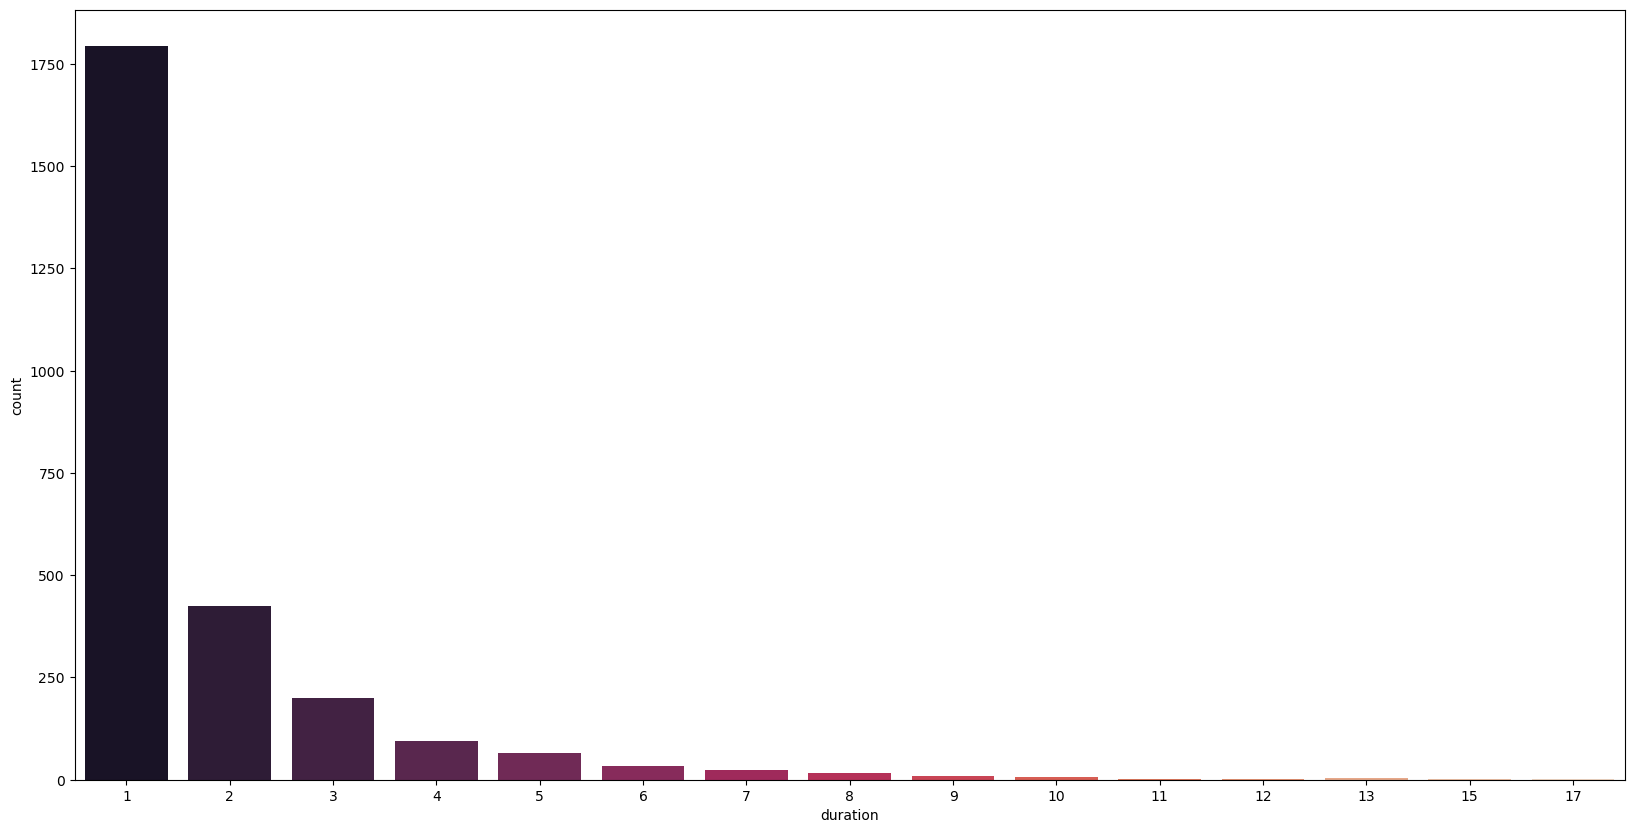

In [42]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x = tv_df['duration'], data = tv_df, palette = 'rocket')
plt.show()

- most tv-shows are `1 season`.

## Most popular rating in movies/Tv shows


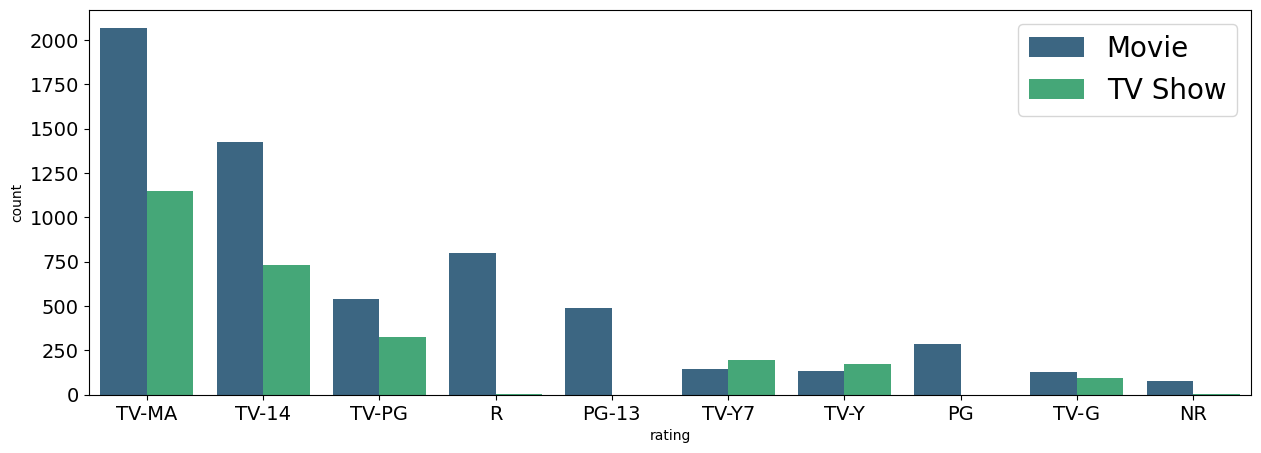

In [43]:
fig, ax = plt.subplots(1,1,figsize=(15,5))

plt.tick_params(labelsize=14)
ax = sns.countplot(x = 'rating', data = nt, palette = 'viridis', hue = 'type',
                   order = nt['rating'].value_counts().index[0:10])

plt.legend(fontsize=20)
plt.show()

- for movies and tv shows `TV-MA` or `Adults` is the most popular rating.


## TV show with the most seasons


In [44]:
tv_df[['duration','title']].sort_values(by = 'duration', ascending = False).head(3)

,duration,title
548,17,Grey's Anatomy
2423,15,Supernatural
4798,15,NCIS


- `Grey's Anatomy` is the tv show that has most number of seasons.

## Content by Indians?

In [45]:
ind = nt[nt['country'] == 'India']
pd.DataFrame(dict(ind[['title', 'director']].items()))

,title,director
4,Kota Factory,Unkown
24,Jeans,S. Shankar
39,Chhota Bheem,Unkown
50,Dharmakshetra,Unkown
66,Raja Rasoi Aur Anya Kahaniyan,Unkown
...,...,...
8773,Yanda Kartavya Aahe,Kedar Shinde
8775,Yeh Meri Family,Unkown
8798,Zed Plus,Chandra Prakash Dwivedi
8799,Zenda,Avadhoot Gupte


# Summmary
- Based on the last complete year `2020` the best months to add new content are `February`,`March` and `May`.
- The most movie genre is `International Movies`.
- The most movie genre is `International TV shows`.
- `United States` has releasd the most movies and Tv shows.
- Movies duration range is between `90-100` mins.
- Most tv-shows are `1 season`.
- For movies and tv shows `TV-MA` or `Adults` is the most popular rating.